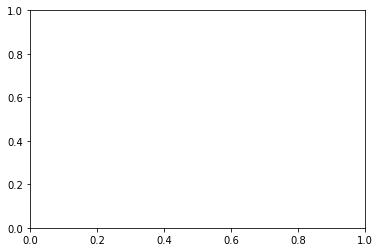

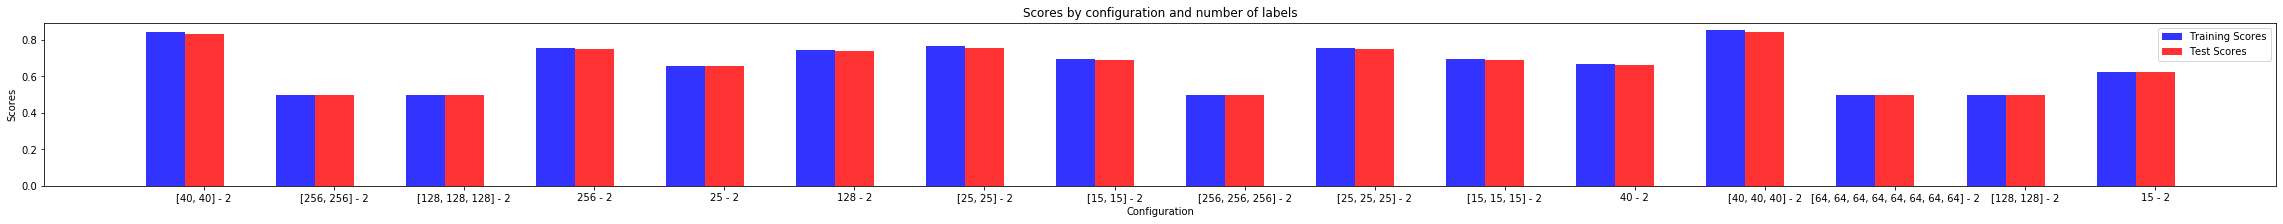

In [38]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

files = os.listdir("./logs/2_labels")


training_scores = []
test_scores = []
str_labels = []

for file in files:
    with open(f'./logs/2_labels/{file}') as json_file:
        json_file = json.load(json_file)
        number_of_labels = json_file['number_of_labels']
        training_score = json_file['training_score']
        test_score = json_file['test_score']
        layers = json_file['layers']

        final_label = str(layers) + " - " + str(number_of_labels)

        training_scores.append(training_score)
        test_scores.append(test_score)
        str_labels.append(final_label)


# # data to plot
n_groups = len(files)

# # create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

plt.figure(figsize=(40, 3))

rect1 = plt.bar(index, training_scores, bar_width, alpha=opacity, color='b', label='Training Scores')
rect2 = plt.bar(index + bar_width, test_scores, bar_width, alpha=opacity, color='r', label='Test Scores')

plt.xlabel('Configuration')
plt.ylabel('Scores')
plt.title('Scores by configuration and number of labels')
plt.xticks(index + bar_width, str_labels)
plt.legend()

plt.savefig('graph.png')

plt.show()


In [43]:
import numpy as np
import pandas as pd
from pymongo import MongoClient

In [44]:
client = MongoClient('localhost', 27017)
db = client['spotify_analysis']

In [45]:
dataset = db.dataset.find({})
dataframe =  pd.DataFrame(list(dataset))

In [46]:
modified_df = dataframe
del modified_df["_id"]
del modified_df["music_name"]
del modified_df["artist"]

In [47]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

to_normalize = ["acousticness", "danceability" ,"energy", "instrumentalness","liveness","loudness","speechiness","valence","tempo"]

for attr_to_normalize in to_normalize:
    attrb = modified_df[[attr_to_normalize]].values.astype(float)
    attrb_scaled = min_max_scaler.fit_transform(attrb)
    attrb_normalized = pd.DataFrame(attrb_scaled)
    
    del modified_df[attr_to_normalize]
    modified_df[attr_to_normalize] = attrb_normalized

In [49]:
modified_df


,first_week,second_week,third_week,fourth_week,january,february,march,april,may,june,...,position,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,1,0,0,0,1,0,0,0,0,0,...,1,0.462456,0.943791,0.595825,0.000000,0.028188,0.913215,0.045969,0.881398,0.497041
1,1,0,0,0,1,0,0,0,0,0,...,2,0.594306,0.758170,0.430062,0.003952,0.073516,0.637066,0.025479,0.439043,0.448362
2,1,0,0,0,1,0,0,0,0,0,...,3,0.488826,0.552941,0.949862,0.000000,0.845121,0.851410,0.118361,0.595042,0.644396
3,1,0,0,0,1,0,0,0,0,0,...,4,0.430001,0.844444,0.592756,0.000000,0.226639,0.720417,0.015368,0.787370,0.460876
4,1,0,0,0,1,0,0,0,0,0,...,5,0.092869,0.572549,0.929397,0.000000,0.391843,0.838663,0.054462,0.864302,0.521764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199795,0,0,0,1,0,0,0,1,0,0,...,196,0.261638,0.694118,0.605034,0.004017,0.104801,0.764282,0.164195,0.463618,0.161068
199796,0,0,0,1,0,0,0,1,0,0,...,197,0.050170,0.526797,0.803540,0.019114,0.082086,0.853127,0.014020,0.383481,0.461102
199797,0,0,0,1,0,0,0,1,0,0,...,198,0.491869,0.615686,0.437225,0.000000,0.110996,0.674020,0.012402,0.113153,0.282349
199798,0,0,0,1,0,0,0,1,0,0,...,199,0.038811,0.623529,0.944746,0.000015,0.070521,0.839693,0.049339,0.077893,0.301723


In [71]:
months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
weeks = ['first_week', 'second_week', 'third_week', 'fourth_week']


for month in months:
    for week in weeks:
        df_with_query = modified_df.query(f'{month} == 1 & {week} == 1')
        acousticness = df_with_query['acousticness'].mean()
        danceability = df_with_query['danceability'].mean()
        energy = df_with_query['energy'].mean()
        instrumentalness = df_with_query['instrumentalness'].mean()
        liveness = df_with_query['liveness'].mean()
        speechiness = df_with_query['speechiness'].mean()
        valence = df_with_query['valence'].mean()
        tempo = df_with_query['tempo'].mean()

        info_object = {
            "month" : month,
            "week" : week,
            "acousticness" : acousticness,
            "danceability" : danceability,
            "energy" : energy,
            "instrumentalness" : instrumentalness,
            "liveness" : liveness,
            "speechiness" : speechiness,
            "valence" : valence,
            "tempo" : tempo
        }

        with open(f'./mean_months/{month}-{week}.result.json', 'w') as outfile:
                json.dump(info_object, outfile)





In [98]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

files = os.listdir("./mean_months/")

best_acousticness_difference = 0
best_acousticness_difference_month = ''
best_acousticness_difference_week = ''

best_danceability_difference = 0
best_danceability_difference_month = ''
best_danceability_difference_week = ''

best_energy_difference = 0
best_energy_difference_month = ''
best_energy_difference_week = ''

best_instrumentalness_difference = 0
best_instrumentalness_difference_month = ''
best_instrumentalness_difference_week = ''

best_liveness_difference = 0
best_liveness_difference_month = ''
best_liveness_difference_week = ''

best_speechiness_difference = 0
best_speechiness_difference_month = ''
best_speechiness_difference_week = ''

best_valence_difference = 0
best_valence_difference_month = ''
best_valence_difference_week = ''

best_tempo_difference = 0
best_tempo_difference_month = ''
best_tempo_difference_week = ''

def calculate_difference(value1, value2, current_best_value):
    if abs(value1 - value2) > current_best_value:        
        return abs(value1 - value2)
    return current_best_value

def change_label(value1, value2, current_best_value, label1, label2, current_label):
    if abs(value1 - value2) >= current_best_value:
        if value1 - value2 > 0:
            return label1 + ' - ' + label2    
        return label1 + ' + ' + label2    
    return current_label


for file in files:
    for file2 in files:
        if file == "graphs" or file2 == "graphs":
            continue
        if file == file2:
            continue

        with open(f'./mean_months/{file}') as json_file:
            with open(f'./mean_months/{file2}') as json_file2:

                json_file = json.load(json_file)
                json_file2 = json.load(json_file2)
                
                #print(f'Avaliando {file} e {file2}')

                if not 'week' in json_file or not 'week' in json_file2:
                    continue
                    
                #print("eita")
                month1= json_file['month']
                month2= json_file2['month']
                
                week1 = json_file['week']
                week2 = json_file2['week']

                best_acousticness_difference = calculate_difference(json_file['acousticness'], json_file2['acousticness'], best_acousticness_difference)
                best_acousticness_difference_month = change_label(json_file['acousticness'], json_file2['acousticness'], best_acousticness_difference, month1, month2, best_acousticness_difference_month)
                best_acousticness_difference_week = change_label(json_file['acousticness'], json_file2['acousticness'], best_acousticness_difference, week1, week2, best_acousticness_difference_week)

                best_danceability_difference = calculate_difference(json_file['danceability'], json_file2['danceability'], best_danceability_difference)
                best_danceability_difference_month = change_label(json_file['danceability'], json_file2['danceability'], best_danceability_difference, month1, month2, best_danceability_difference_month)
                best_danceability_difference_week = change_label(json_file['danceability'], json_file2['danceability'], best_danceability_difference, week1, week2, best_danceability_difference_week)

                best_energy_difference = calculate_difference(json_file['energy'], json_file2['energy'], best_energy_difference)
                best_energy_difference_month = change_label(json_file['energy'], json_file2['energy'], best_energy_difference, month1, month2, best_energy_difference_month)
                best_energy_difference_week = change_label(json_file['energy'], json_file2['energy'], best_energy_difference, week1, week2, best_energy_difference_week)


                best_instrumentalness_difference = calculate_difference(json_file['instrumentalness'], json_file2['instrumentalness'], best_instrumentalness_difference)
                best_instrumentalness_difference_month = change_label(json_file['instrumentalness'], json_file2['instrumentalness'], best_instrumentalness_difference, month1, month2, best_instrumentalness_difference_month)
                best_instrumentalness_difference_week = change_label(json_file['instrumentalness'], json_file2['instrumentalness'], best_instrumentalness_difference, week1, week2, best_instrumentalness_difference_week)


                best_liveness_difference = calculate_difference(json_file['liveness'], json_file2['liveness'], best_liveness_difference)
                best_liveness_difference_month = change_label(json_file['liveness'], json_file2['liveness'], best_liveness_difference, month1, month2, best_liveness_difference_month)
                best_liveness_difference_week = change_label(json_file['liveness'], json_file2['liveness'], best_liveness_difference, week1, week2, best_liveness_difference_week)


                best_speechiness_difference = calculate_difference(json_file['speechiness'], json_file2['speechiness'], best_speechiness_difference)
                best_speechiness_difference_month = change_label(json_file['speechiness'], json_file2['speechiness'], best_speechiness_difference, month1, month2, best_speechiness_difference_month)
                best_speechiness_difference_week = change_label(json_file['speechiness'], json_file2['speechiness'], best_speechiness_difference, week1, week2, best_speechiness_difference_week)


                best_valence_difference = calculate_difference(json_file['valence'], json_file2['valence'], best_valence_difference)
                best_valence_difference_month = change_label(json_file['valence'], json_file2['valence'], best_valence_difference, month1, month2, best_valence_difference_month)
                best_valence_difference_week = change_label(json_file['valence'], json_file2['valence'], best_valence_difference, week1, week2, best_valence_difference_week)


                best_tempo_difference = calculate_difference(json_file['tempo'], json_file2['tempo'], best_tempo_difference)
                best_tempo_difference_month = change_label(json_file['tempo'], json_file2['tempo'], best_tempo_difference, month1, month2, best_tempo_difference_month)
                best_tempo_difference_week = change_label(json_file['tempo'], json_file2['tempo'], best_tempo_difference, week1, week2, best_tempo_difference_week)



obj_to_save = {
    'best_acousticness_difference' :  best_acousticness_difference,
    'best_acousticness_difference_month' : best_acousticness_difference_month,
    'best_acousticness_difference_week' : best_acousticness_difference_week,
    'best_danceability_difference' :  best_danceability_difference,
    'best_danceability_difference_month' : best_danceability_difference_month,
    'best_danceability_difference_week' : best_danceability_difference_week,
    'best_energy_difference' :  best_energy_difference,
    'best_energy_difference_month' : best_energy_difference_month,
    'best_energy_difference_week' : best_energy_difference_week,
    'best_instrumentalness_difference' :  best_instrumentalness_difference,
    'best_instrumentalness_difference_month' : best_instrumentalness_difference_month,
    'best_instrumentalness_difference_week' : best_instrumentalness_difference_week,
    'best_liveness_difference' :  best_liveness_difference,
    'best_liveness_difference_month' : best_liveness_difference_month,
    'best_liveness_difference_week' : best_liveness_difference_week,
    'best_speechiness_difference' :  best_speechiness_difference,
    'best_speechiness_difference_month' : best_speechiness_difference_month,
    'best_speechiness_difference_week' : best_speechiness_difference_week,
    'best_valence_difference' :  best_valence_difference,
    'best_valence_difference_month' : best_valence_difference_month,
    'best_valence_difference_week' : best_valence_difference_week,
    'best_tempo_difference' :  best_tempo_difference,
    'best_tempo_difference_month' : best_tempo_difference_month,
    'best_tempo_difference_week' : best_tempo_difference_week
}

with open(f'./differences.result.json', 'w') as outfile:
    json.dump(obj_to_save, outfile)

In [106]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

files = os.listdir("./mean_months/")

higher_acousticness = 0
higher_acousticness_month = ''
higher_acousticness_week = ''

higher_danceability = 0
higher_danceability_month = ''
higher_danceability_week = ''

higher_energy = 0
higher_energy_month = ''
higher_energy_week = ''

higher_instrumentalness = 0
higher_instrumentalness_month = ''
higher_instrumentalness_week = ''

higher_liveness = 0
higher_liveness_month = ''
higher_liveness_week = ''

higher_speechiness = 0
higher_speechiness_month = ''
higher_speechiness_week = ''

higher_valence = 0
higher_valence_month = ''
higher_valence_week = ''

higher_tempo = 0
higher_tempo_month = ''
higher_tempo_week = ''

def calculate_difference(value1, value2, current_best_value):
    if abs(value1 - value2) > current_best_value:        
        return abs(value1 - value2)
    return current_best_value

def change_label(value1, value2, current_best_value, label1, label2, current_label):
    if abs(value1 - value2) >= current_best_value:
        if value1 - value2 > 0:
            return label1 + ' - ' + label2    
        return label1 + ' + ' + label2    
    return current_label


for file in files:
    if file == "graphs":
            continue

    with open(f'./mean_months/{file}') as json_file:
        
        json_file = json.load(json_file)
        
        if not 'week' in json_file or not 'week' in json_file2:
            continue
        
        
        higher_acousticness = json_file['acousticness'] if json_file['acousticness'] > higher_acousticness else higher_acousticness
        higher_acousticness_month = json_file['month'] if json_file['acousticness'] >= higher_acousticness else higher_acousticness_month
        higher_acousticness_week = json_file['week'] if json_file['acousticness'] >= higher_acousticness else higher_acousticness_week

        higher_danceability  = json_file['danceability'] if json_file['danceability'] > higher_danceability else higher_danceability
        higher_danceability_month = json_file['month'] if json_file['danceability'] >= higher_danceability else higher_danceability_month
        higher_danceability_week = json_file['week'] if json_file['danceability'] >= higher_danceability else higher_danceability_week

        higher_energy = json_file['energy'] if json_file['energy'] > higher_energy else higher_energy
        higher_energy_month = json_file['month'] if json_file['energy'] >= higher_energy else higher_energy_month
        higher_energy_week = json_file['week'] if json_file['energy'] >= higher_energy else higher_energy_week

        higher_instrumentalness  = json_file['instrumentalness'] if json_file['instrumentalness'] > higher_instrumentalness else higher_instrumentalness
        higher_instrumentalness_month = json_file['month'] if json_file['instrumentalness'] >= higher_instrumentalness else higher_instrumentalness_month
        higher_instrumentalness_week = json_file['week'] if json_file['instrumentalness'] >= higher_instrumentalness else higher_instrumentalness_week

        higher_liveness  = json_file['liveness'] if json_file['liveness'] > higher_liveness else higher_liveness
        higher_liveness_month = json_file['month'] if json_file['liveness'] >= higher_liveness else higher_liveness_month
        higher_liveness_week = json_file['week'] if json_file['liveness'] >= higher_liveness else higher_liveness_week

        higher_speechiness  = json_file['speechiness'] if json_file['speechiness'] > higher_speechiness else higher_speechiness
        higher_speechiness_month = json_file['month'] if json_file['speechiness'] >= higher_speechiness else higher_speechiness_month
        higher_speechiness_week = json_file['week'] if json_file['speechiness'] >= higher_speechiness else higher_speechiness_week

        higher_valence  = json_file['valence'] if json_file['valence'] > higher_valence else higher_valence
        higher_valence_month = json_file['month'] if json_file['valence'] >= higher_valence else higher_valence_month
        higher_valence_week = json_file['week'] if json_file['valence'] >= higher_valence else higher_valence_week

        higher_tempo  = json_file['tempo'] if json_file['tempo'] > higher_tempo else higher_tempo
        higher_tempo_month = json_file['month'] if json_file['tempo'] >= higher_tempo else higher_tempo_month
        higher_tempo_week = json_file['week'] if json_file['tempo'] >= higher_tempo else higher_tempo_week




obj_to_save = {
    'higher_acousticness' : higher_acousticness,
    'higher_acousticness_month' : higher_acousticness_month,
    'higher_acousticness_week' : higher_acousticness_week,
    'higher_danceability' : higher_danceability,
    'higher_danceability_month' : higher_danceability_month,
    'higher_danceability_week' : higher_danceability_week,
    'higher_energy' : higher_energy,
    'higher_energy_month' : higher_energy_month,
    'higher_energy_week' : higher_energy_week,
    'higher_instrumentalness' : higher_instrumentalness,
    'higher_instrumentalness_month' : higher_instrumentalness_month,
    'higher_instrumentalness_week' : higher_instrumentalness_week,
    'higher_liveness' : higher_liveness,
    'higher_liveness_month' : higher_liveness_month,
    'higher_liveness_week' : higher_liveness_week,
    'higher_speechiness' : higher_speechiness,
    'higher_speechiness_month' : higher_speechiness_month,
    'higher_speechiness_week' : higher_speechiness_week,
    'higher_valence' : higher_valence,
    'higher_valence_month' : higher_valence_month,
    'higher_valence_week' : higher_valence_week,
    'higher_tempo' : higher_tempo,
    'higher_tempo_month' : higher_tempo_month,
    'higher_tempo_week' : higher_tempo_week
}

with open(f'./higher_values.result.json', 'w') as outfile:
    json.dump(obj_to_save, outfile)

In [107]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

files = os.listdir("./mean_months/")

lower_acousticness = 2
lower_acousticness_month = ''
lower_acousticness_week = ''

lower_danceability = 2
lower_danceability_month = ''
lower_danceability_week = ''

lower_energy = 2
lower_energy_month = ''
lower_energy_week = ''

lower_instrumentalness = 2
lower_instrumentalness_month = ''
lower_instrumentalness_week = ''

lower_liveness = 2
lower_liveness_month = ''
lower_liveness_week = ''

lower_speechiness = 2
lower_speechiness_month = ''
lower_speechiness_week = ''

lower_valence = 2
lower_valence_month = ''
lower_valence_week = ''

lower_tempo = 2
lower_tempo_month = ''
lower_tempo_week = ''

for file in files:
    if file == "graphs":
        continue

    with open(f'./mean_months/{file}') as json_file:
        
        json_file = json.load(json_file)
        
        if not 'week' in json_file:
            continue
        
        
        lower_acousticness = json_file['acousticness'] if json_file['acousticness'] < lower_acousticness else lower_acousticness
        lower_acousticness_month = json_file['month'] if json_file['acousticness'] <= lower_acousticness else lower_acousticness_month
        lower_acousticness_week = json_file['week'] if json_file['acousticness'] <= lower_acousticness else lower_acousticness_week

        lower_danceability  = json_file['danceability'] if json_file['danceability'] < lower_danceability else lower_danceability
        lower_danceability_month = json_file['month'] if json_file['danceability'] <= lower_danceability else lower_danceability_month
        lower_danceability_week = json_file['week'] if json_file['danceability'] <= lower_danceability else lower_danceability_week

        lower_energy = json_file['energy'] if json_file['energy'] < lower_energy else lower_energy
        lower_energy_month = json_file['month'] if json_file['energy'] <= lower_energy else lower_energy_month
        lower_energy_week = json_file['week'] if json_file['energy'] <= lower_energy else lower_energy_week

        lower_instrumentalness  = json_file['instrumentalness'] if json_file['instrumentalness'] < lower_instrumentalness else lower_instrumentalness
        lower_instrumentalness_month = json_file['month'] if json_file['instrumentalness'] <= lower_instrumentalness else lower_instrumentalness_month
        lower_instrumentalness_week = json_file['week'] if json_file['instrumentalness'] <= lower_instrumentalness else lower_instrumentalness_week

        lower_liveness  = json_file['liveness'] if json_file['liveness'] < lower_liveness else lower_liveness
        lower_liveness_month = json_file['month'] if json_file['liveness'] <= lower_liveness else lower_liveness_month
        lower_liveness_week = json_file['week'] if json_file['liveness'] <= lower_liveness else lower_liveness_week

        lower_speechiness  = json_file['speechiness'] if json_file['speechiness'] < lower_speechiness else lower_speechiness
        lower_speechiness_month = json_file['month'] if json_file['speechiness'] <= lower_speechiness else lower_speechiness_month
        lower_speechiness_week = json_file['week'] if json_file['speechiness'] <= lower_speechiness else lower_speechiness_week

        lower_valence  = json_file['valence'] if json_file['valence'] < lower_valence else lower_valence
        lower_valence_month = json_file['month'] if json_file['valence'] <= lower_valence else lower_valence_month
        lower_valence_week = json_file['week'] if json_file['valence'] <= lower_valence else lower_valence_week

        lower_tempo  = json_file['tempo'] if json_file['tempo'] < lower_tempo else lower_tempo
        lower_tempo_month = json_file['month'] if json_file['tempo'] <= lower_tempo else lower_tempo_month
        lower_tempo_week = json_file['week'] if json_file['tempo'] <= lower_tempo else lower_tempo_week




obj_to_save = {
    'lower_acousticness' : lower_acousticness,
    'lower_acousticness_month' : lower_acousticness_month,
    'lower_acousticness_week' : lower_acousticness_week,
    'lower_danceability' : lower_danceability,
    'lower_danceability_month' : lower_danceability_month,
    'lower_danceability_week' : lower_danceability_week,
    'lower_energy' : lower_energy,
    'lower_energy_month' : lower_energy_month,
    'lower_energy_week' : lower_energy_week,
    'lower_instrumentalness' : lower_instrumentalness,
    'lower_instrumentalness_month' : lower_instrumentalness_month,
    'lower_instrumentalness_week' : lower_instrumentalness_week,
    'lower_liveness' : lower_liveness,
    'lower_liveness_month' : lower_liveness_month,
    'lower_liveness_week' : lower_liveness_week,
    'lower_speechiness' : lower_speechiness,
    'lower_speechiness_month' : lower_speechiness_month,
    'lower_speechiness_week' : lower_speechiness_week,
    'lower_valence' : lower_valence,
    'lower_valence_month' : lower_valence_month,
    'lower_valence_week' : lower_valence_week,
    'lower_tempo' : lower_tempo,
    'lower_tempo_month' : lower_tempo_month,
    'lower_tempo_week' : lower_tempo_week
}

with open(f'./lower_values.result.json', 'w') as outfile:
    json.dump(obj_to_save, outfile)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


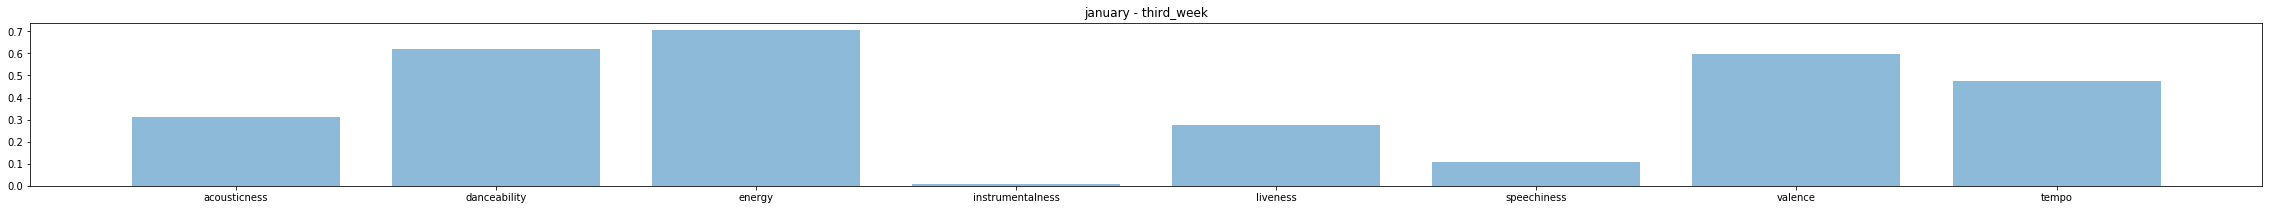

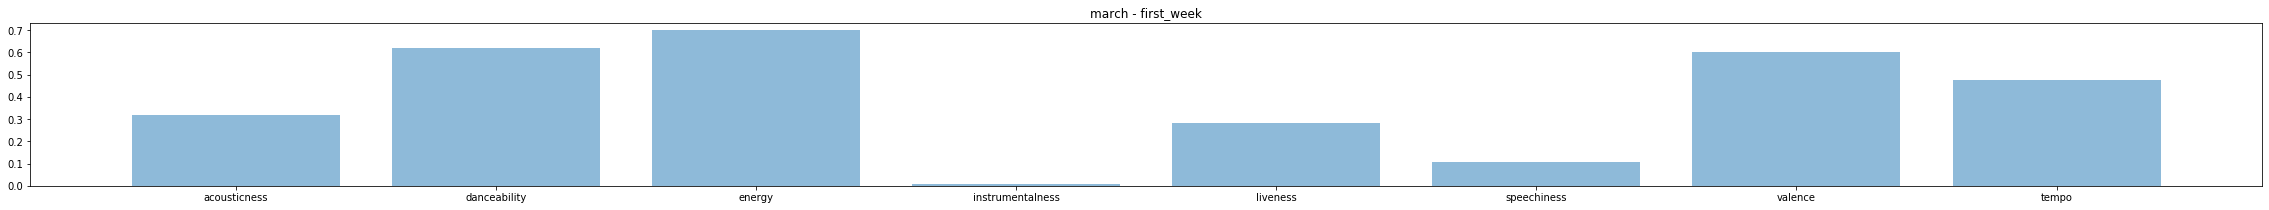

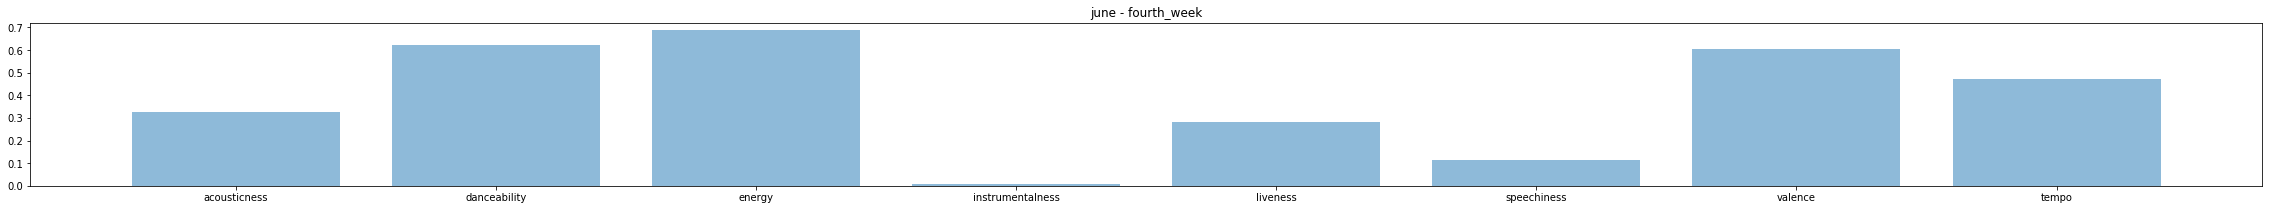

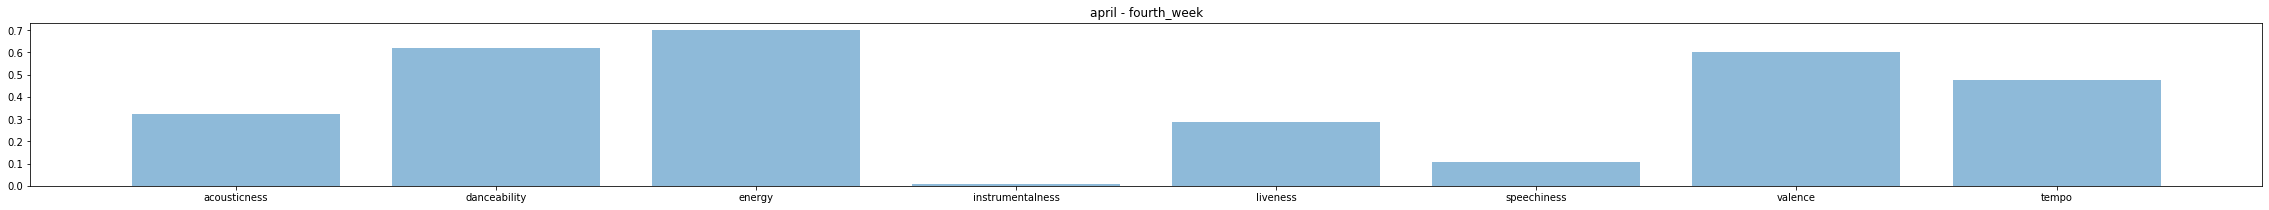

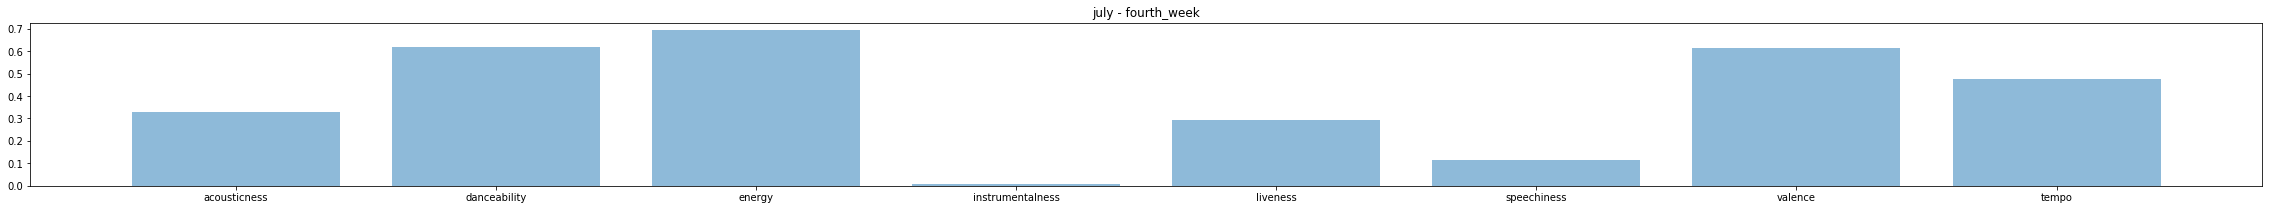

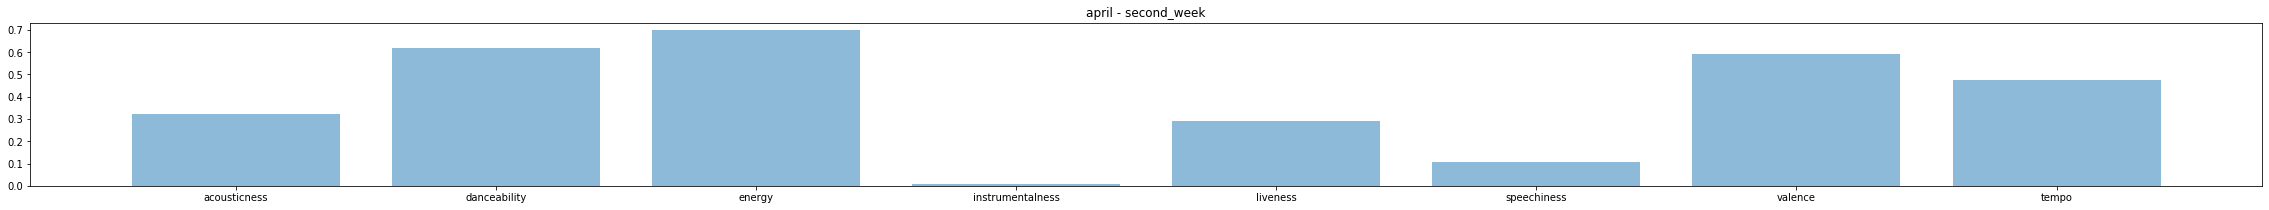

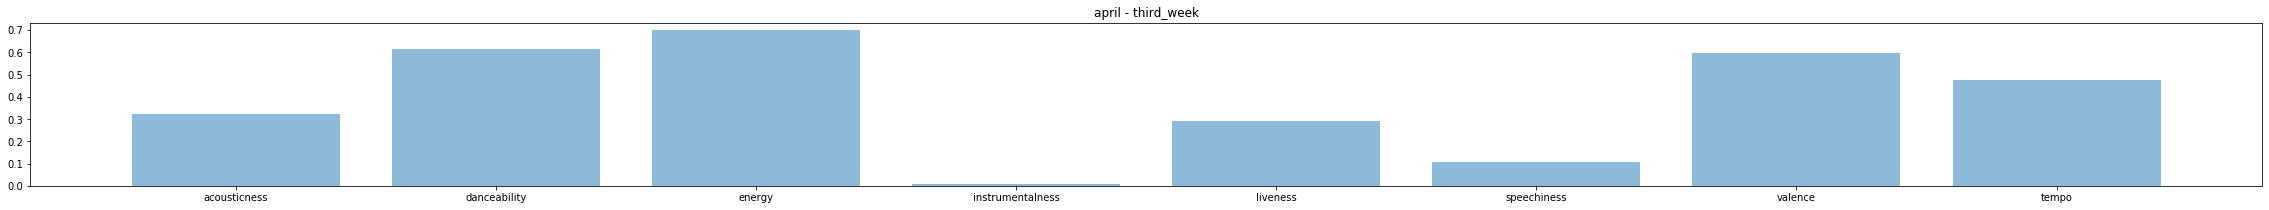

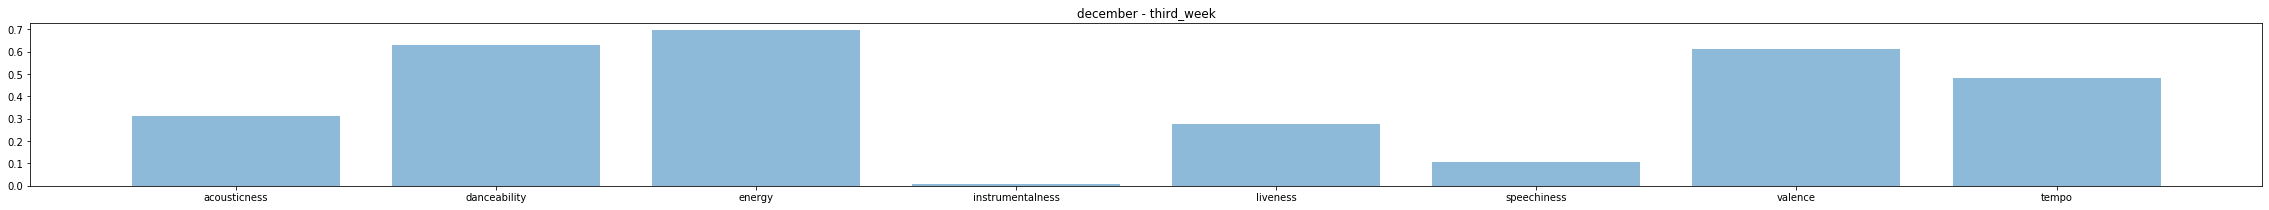

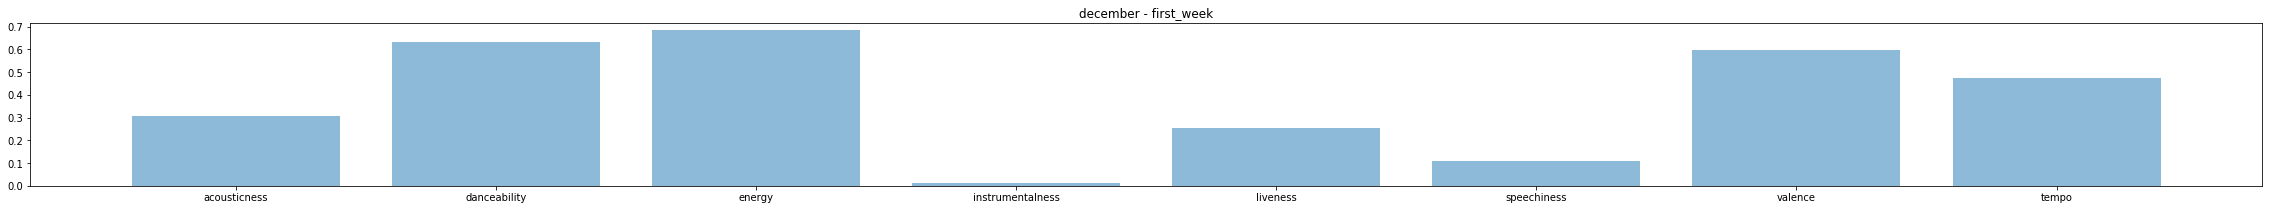

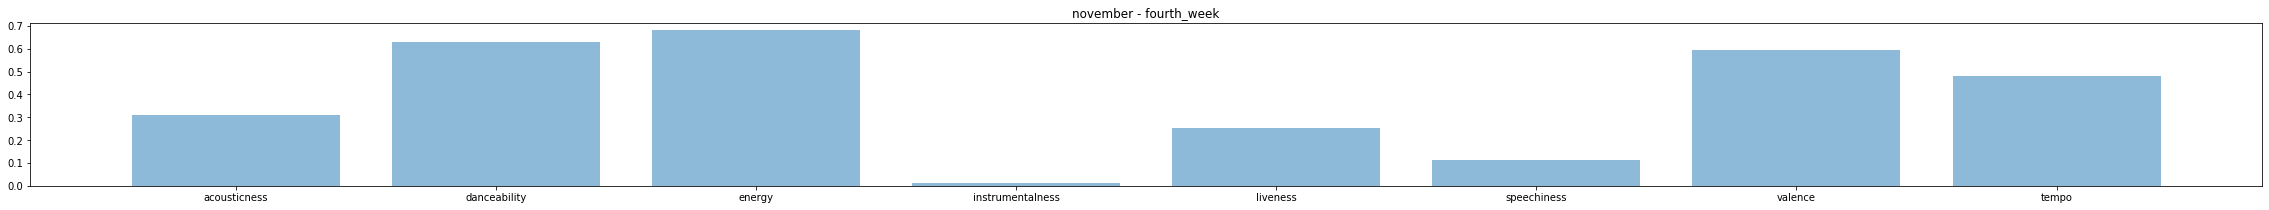

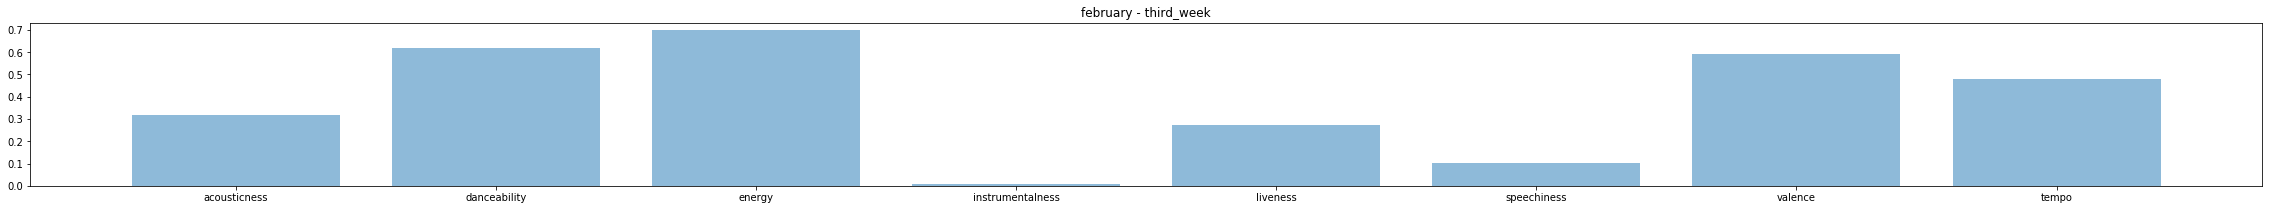

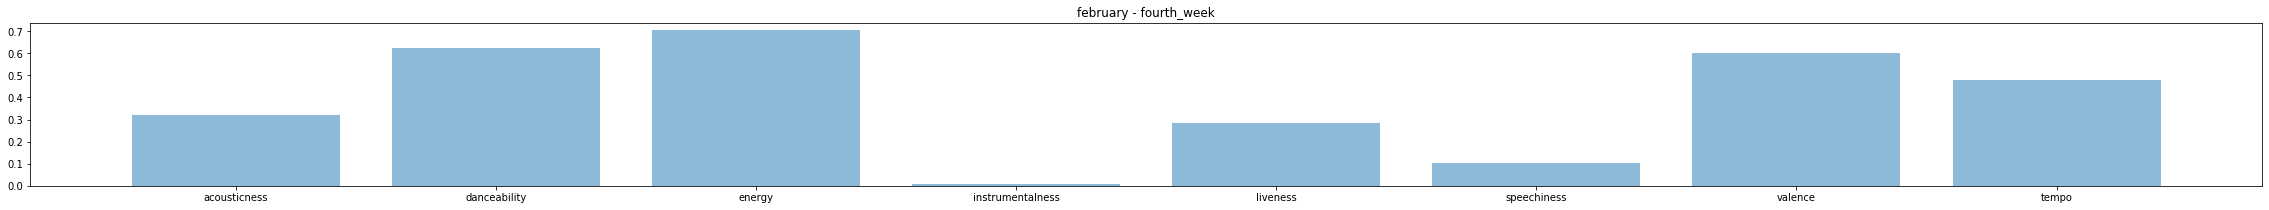

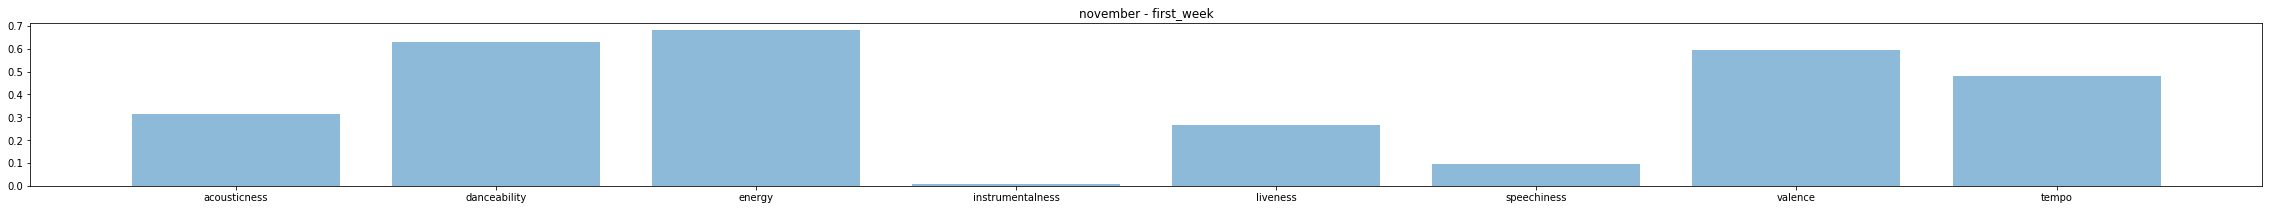

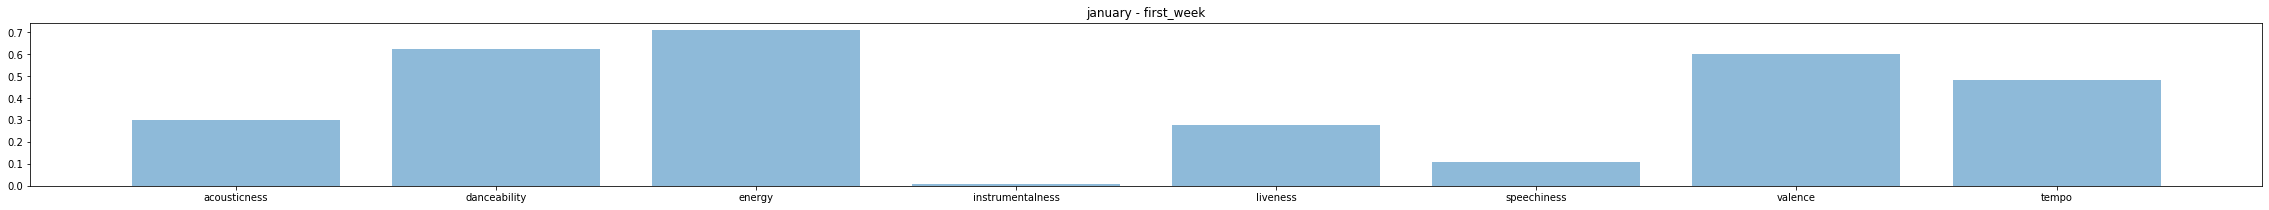

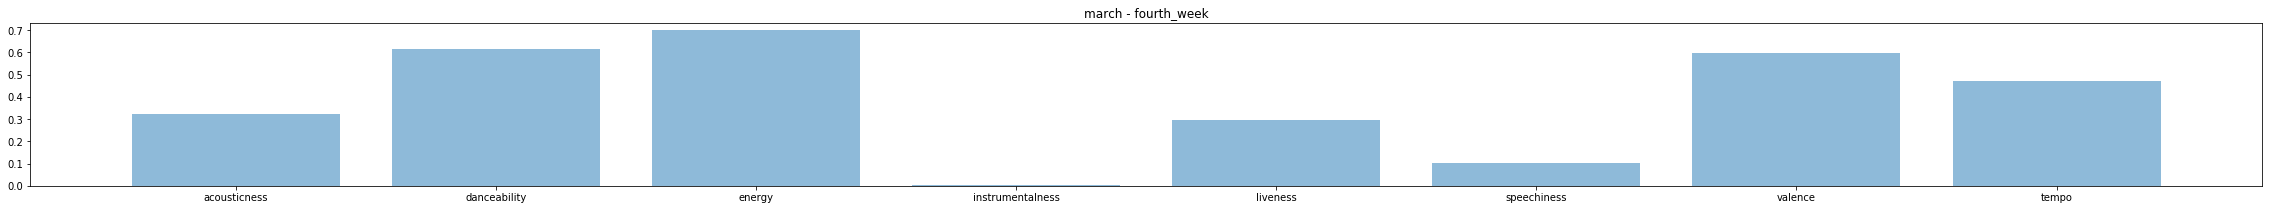

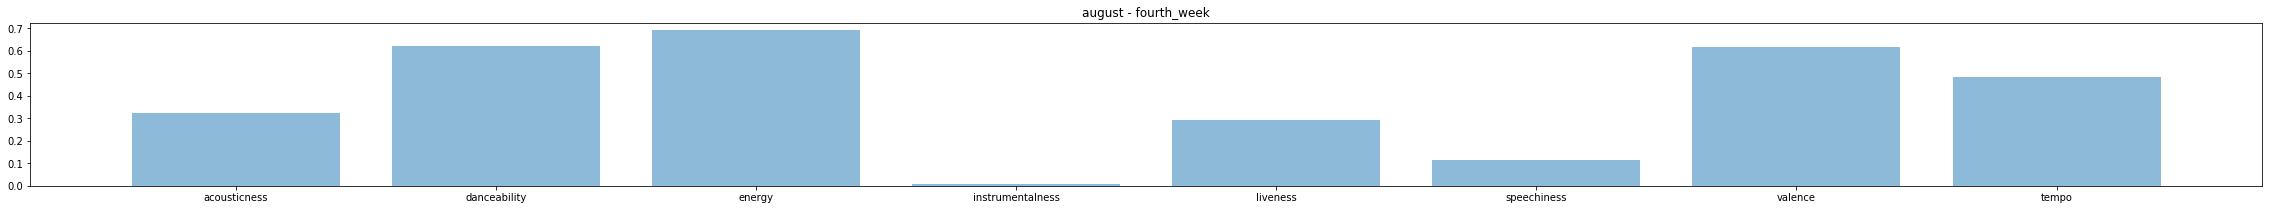

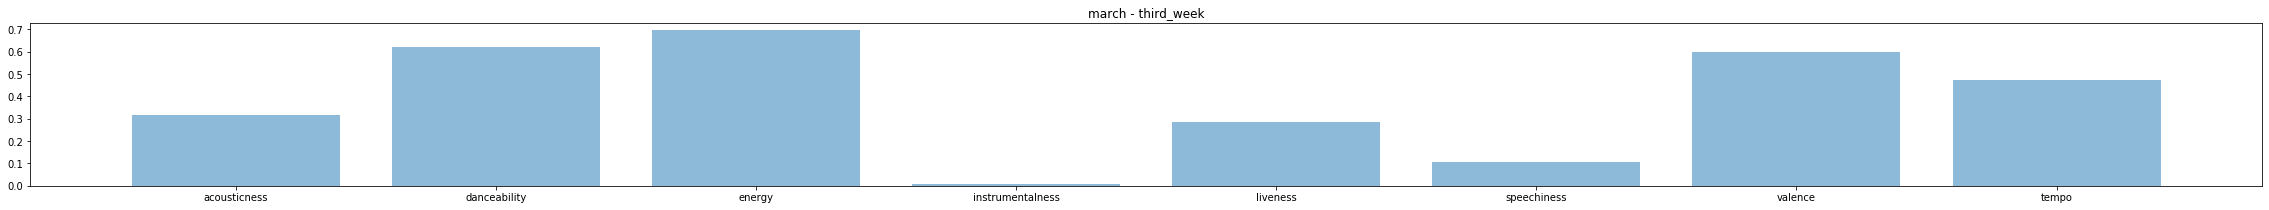

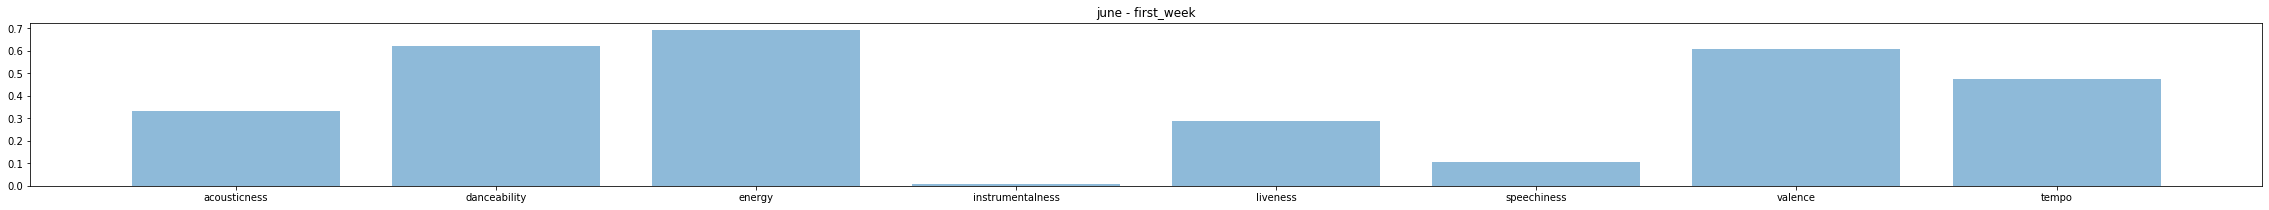

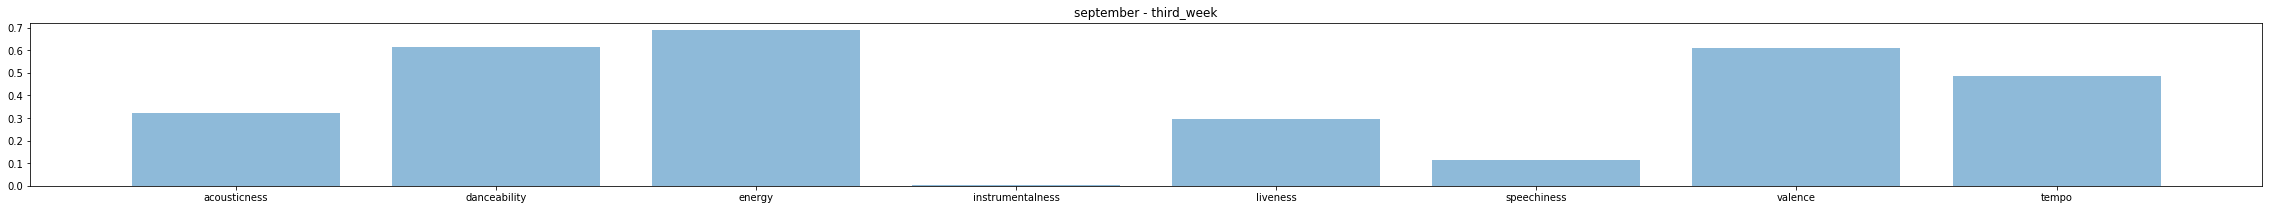

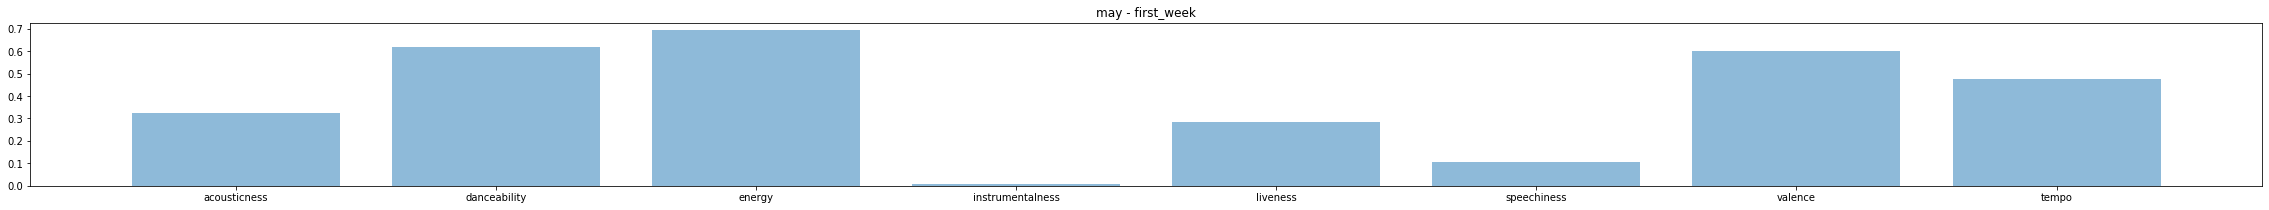

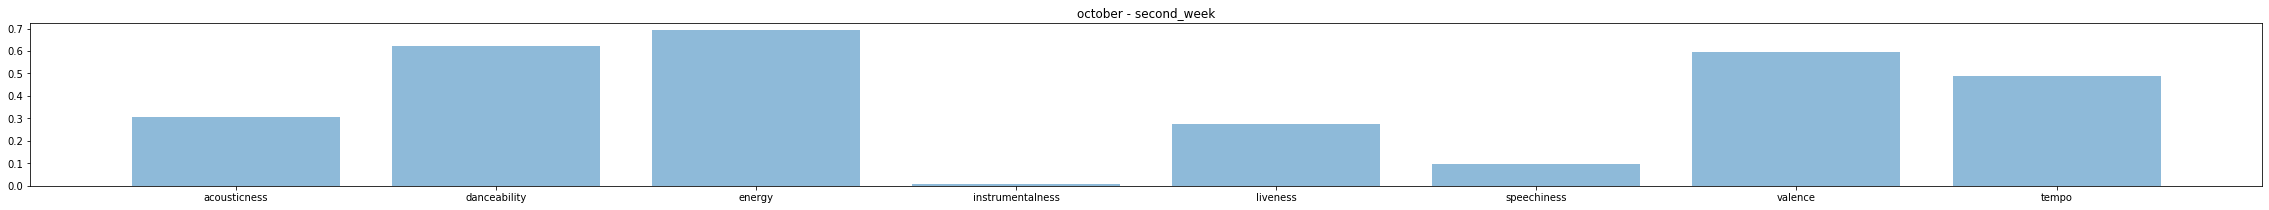

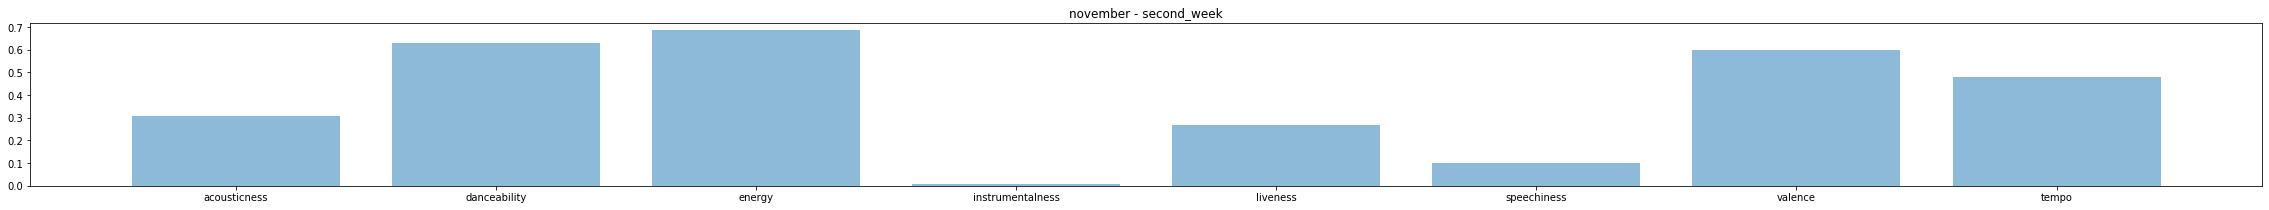

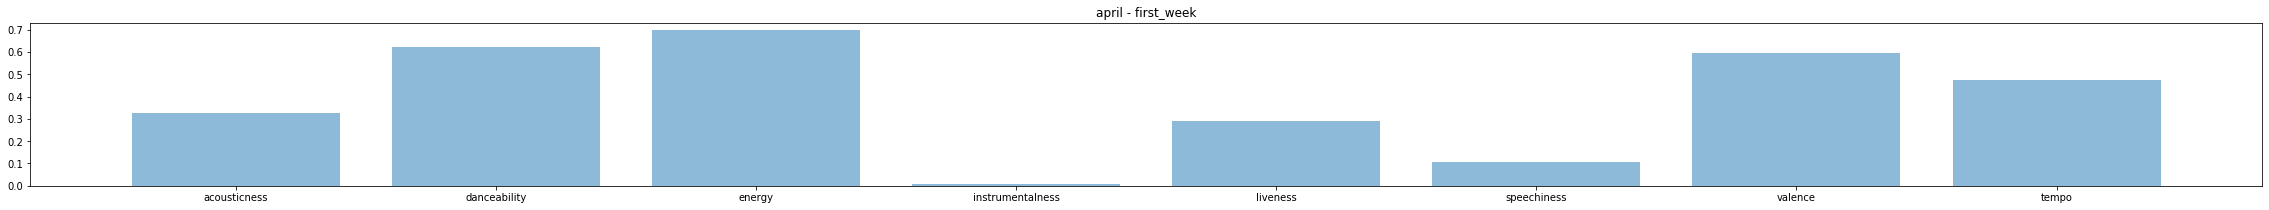

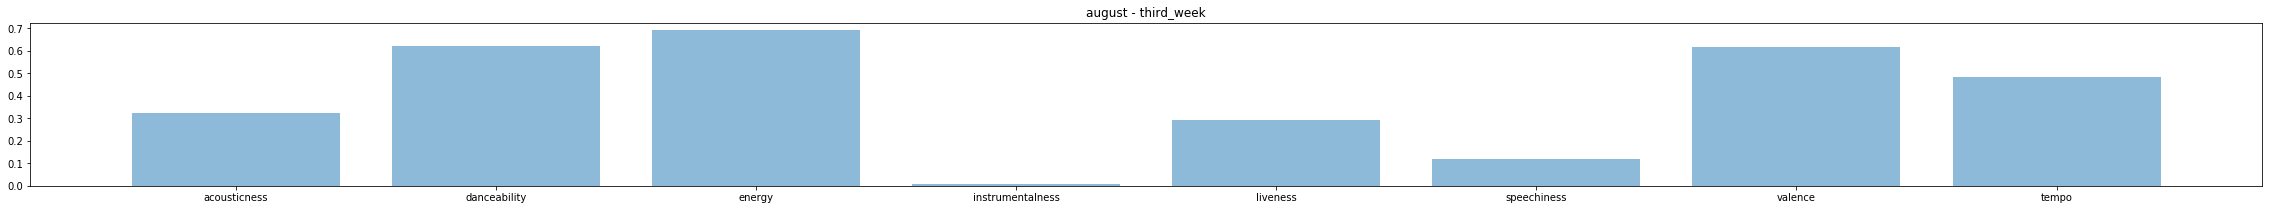

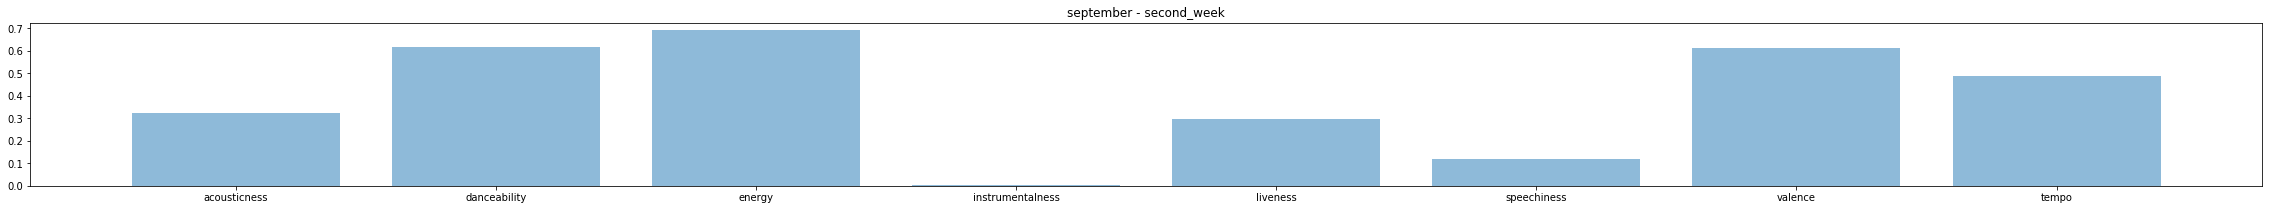

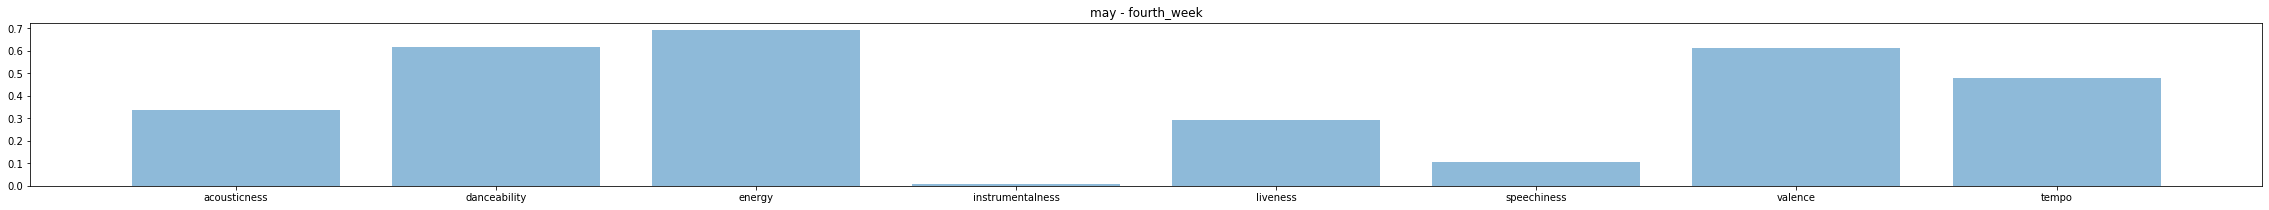

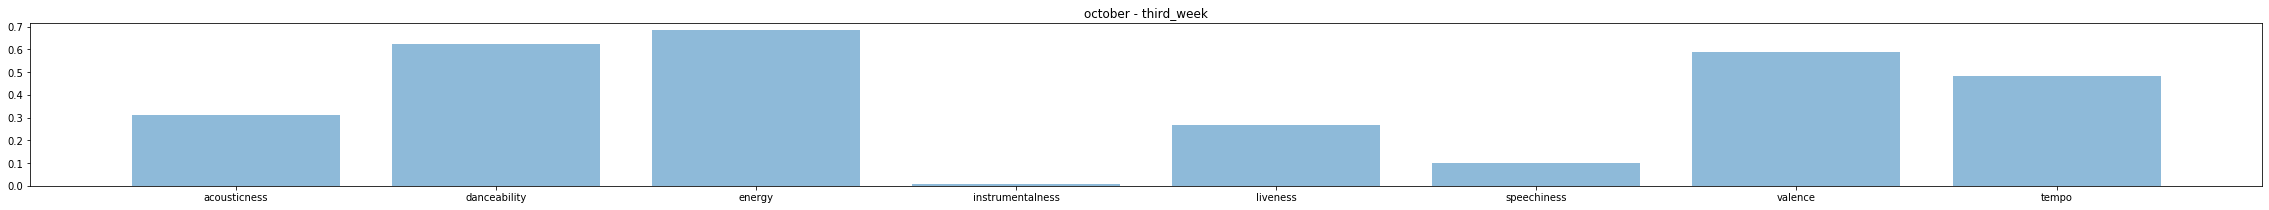

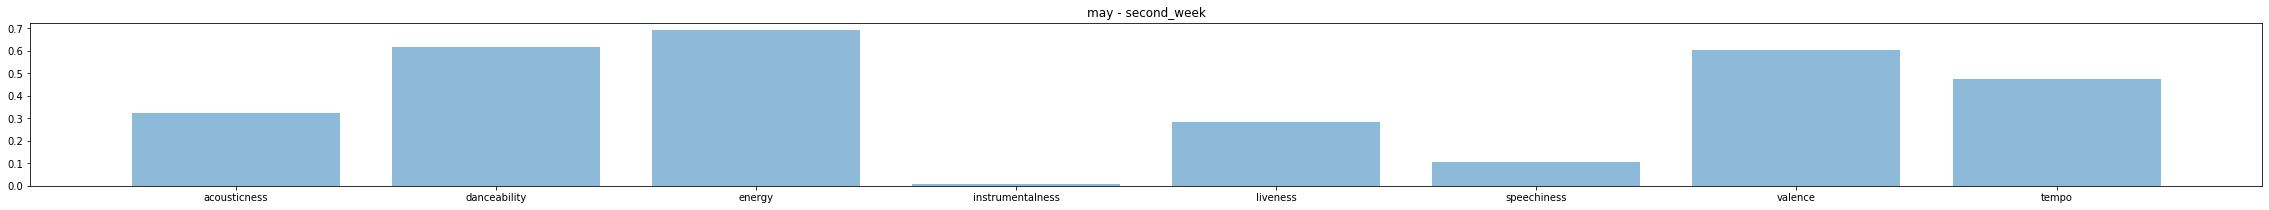

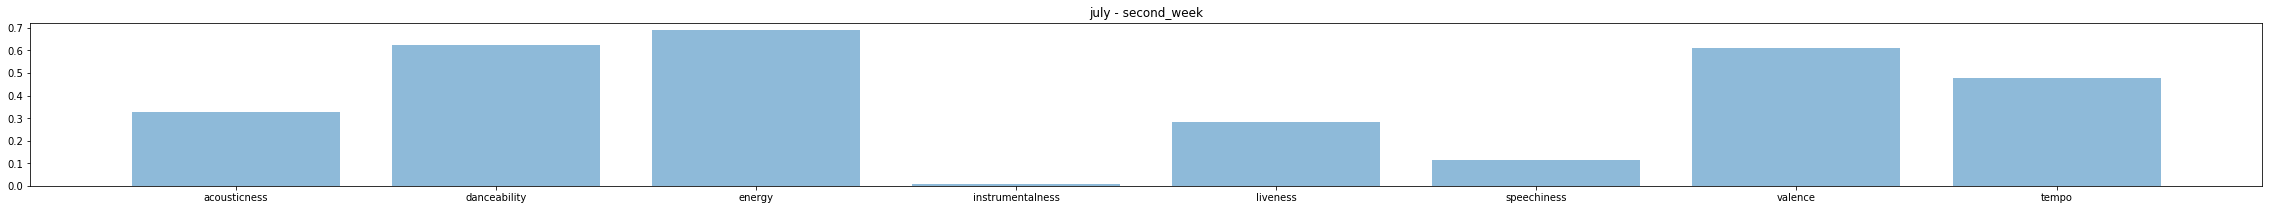

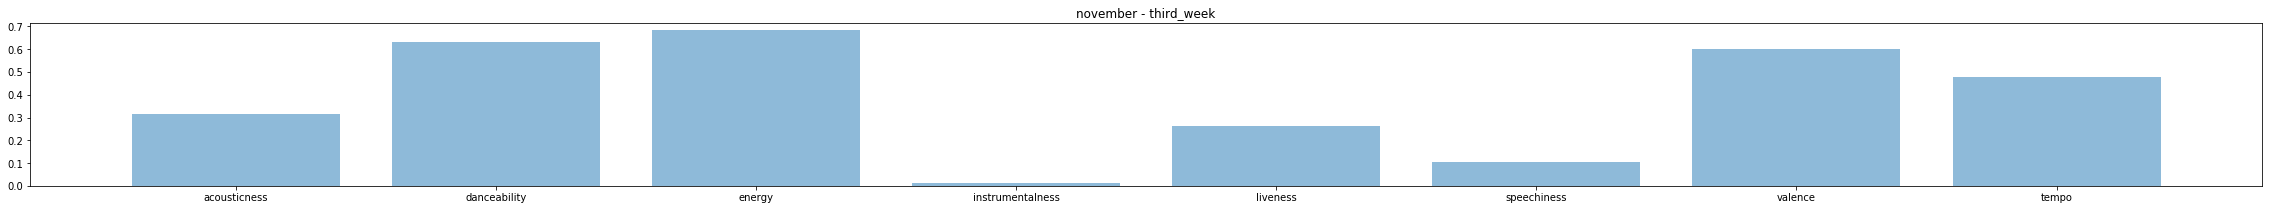

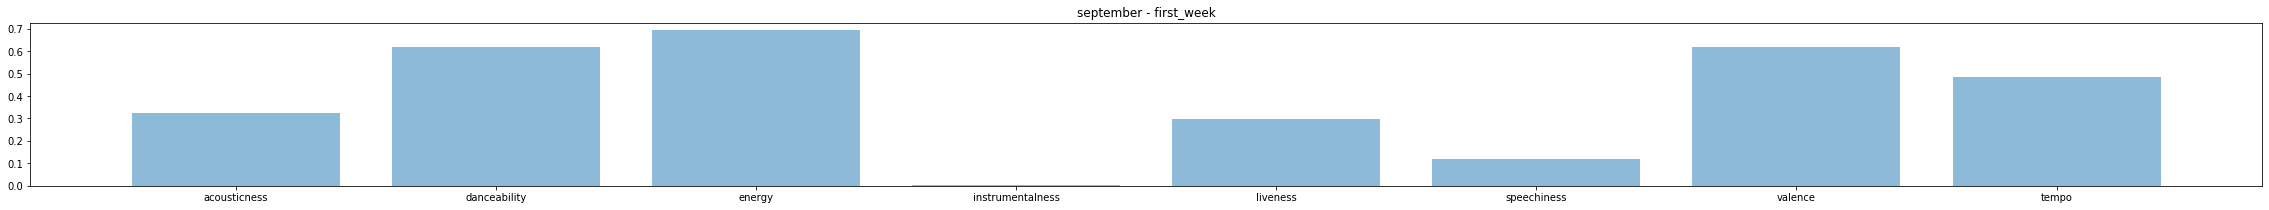

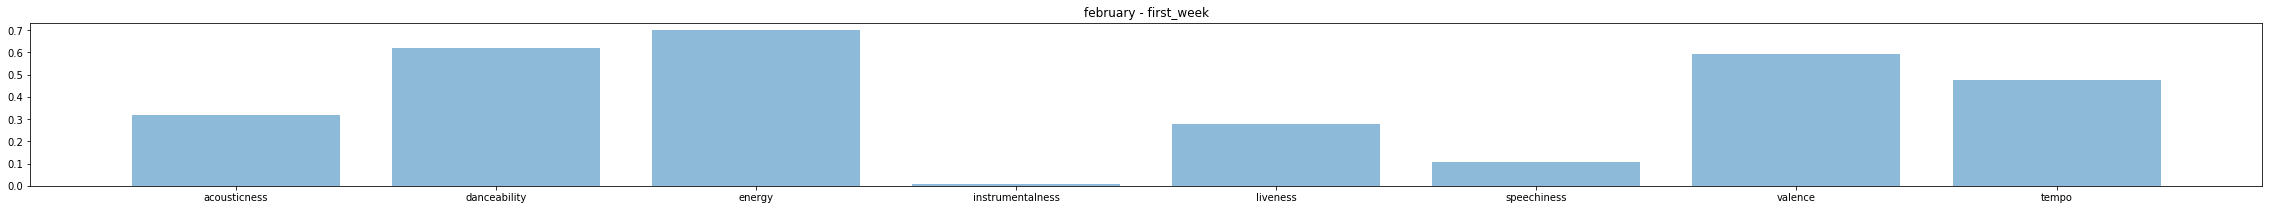

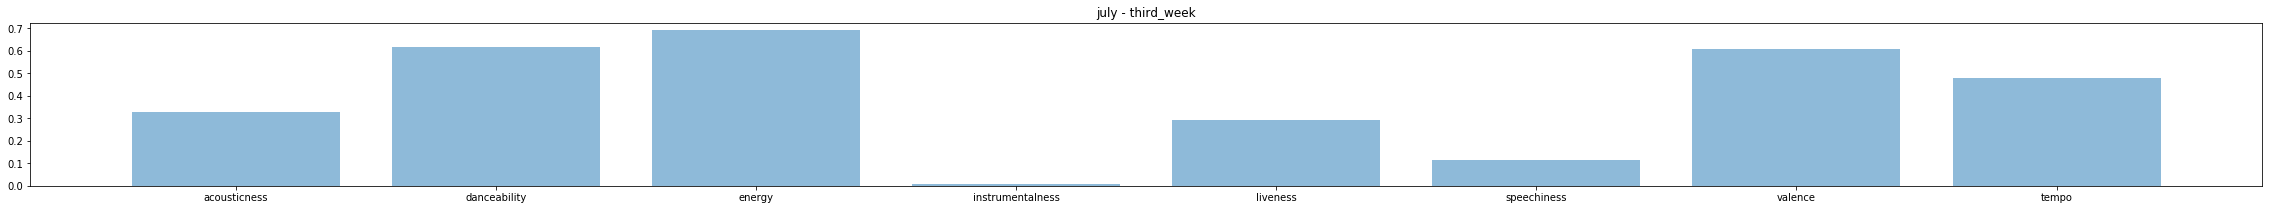

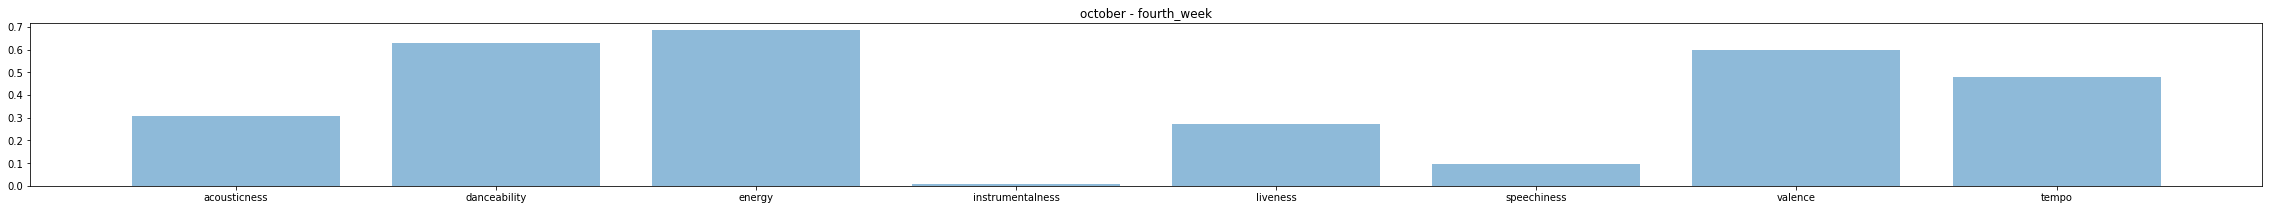

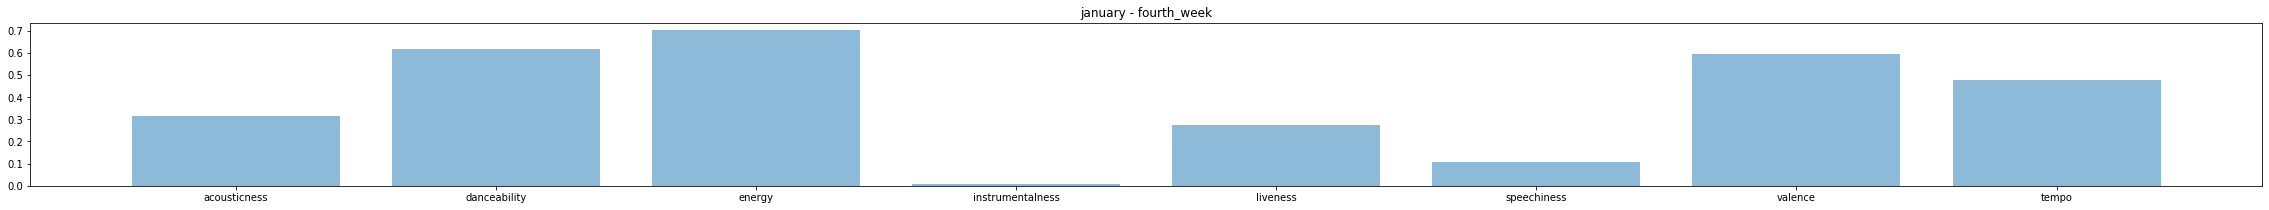

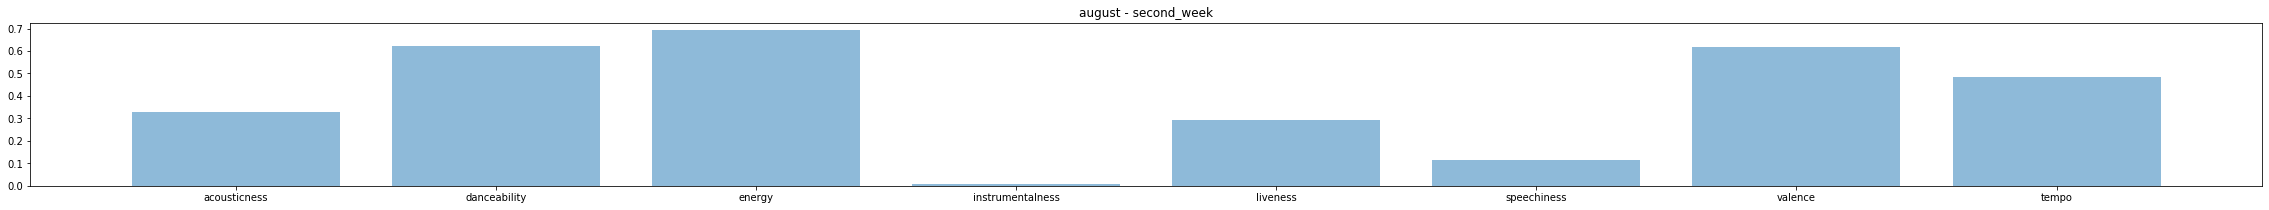

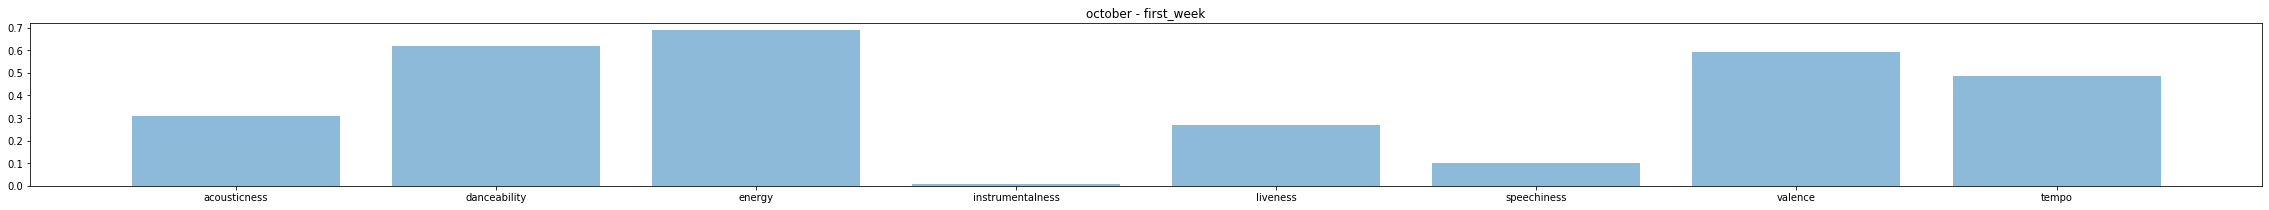

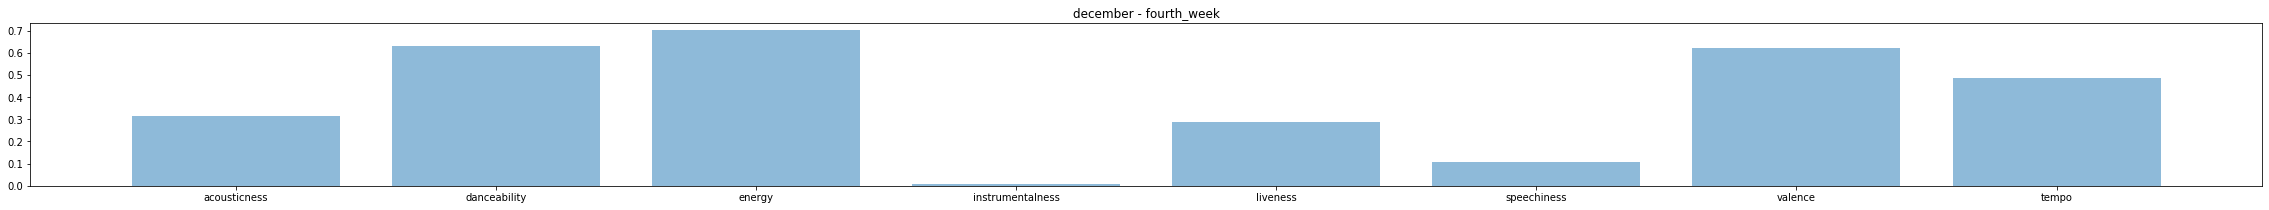

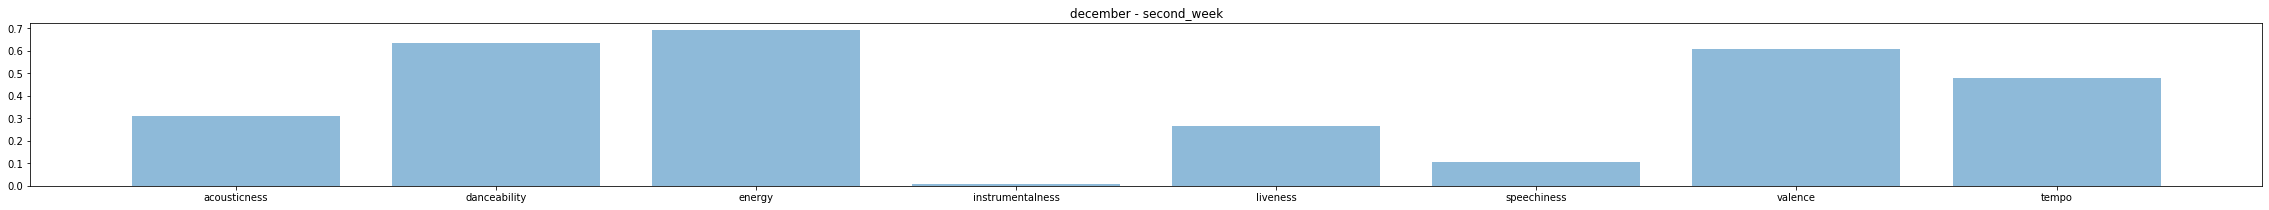

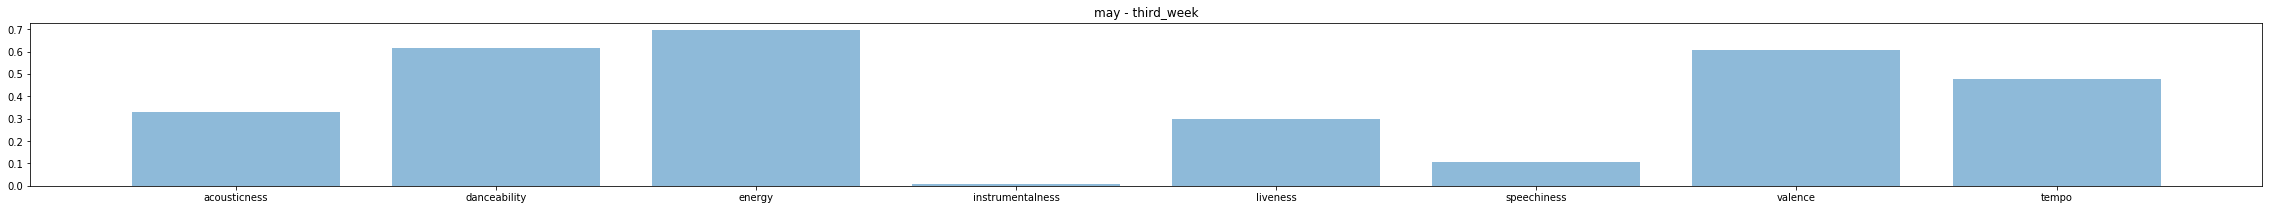

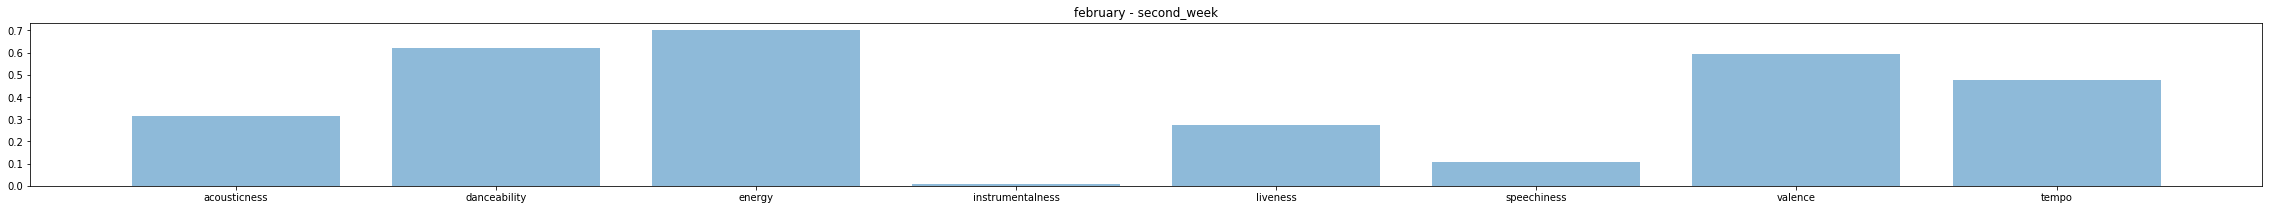

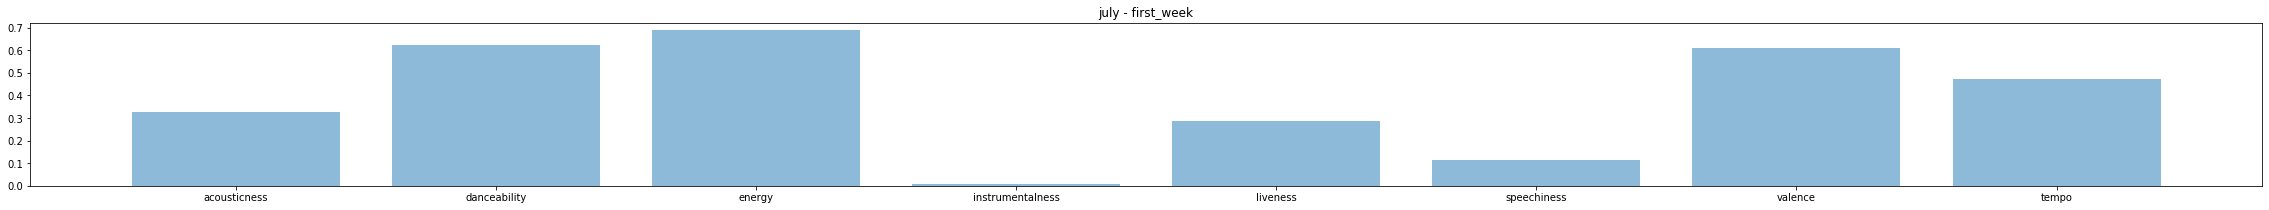

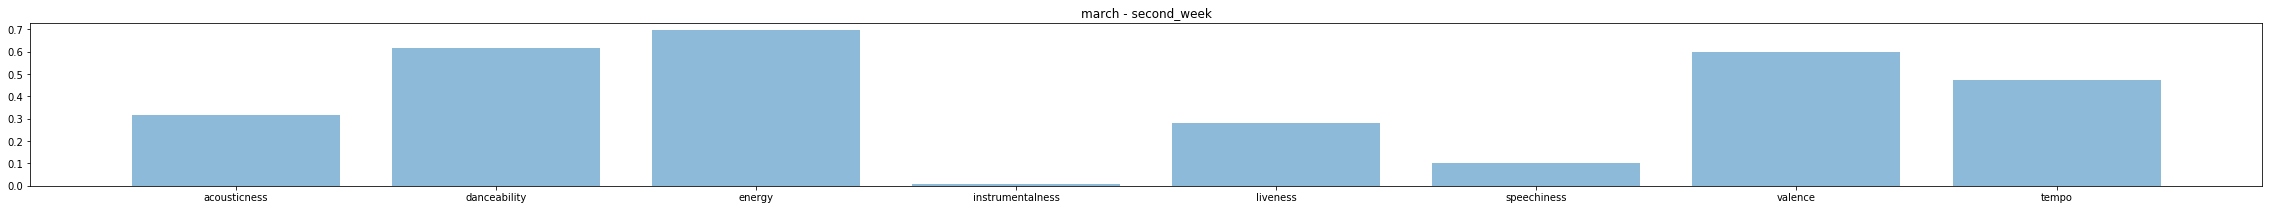

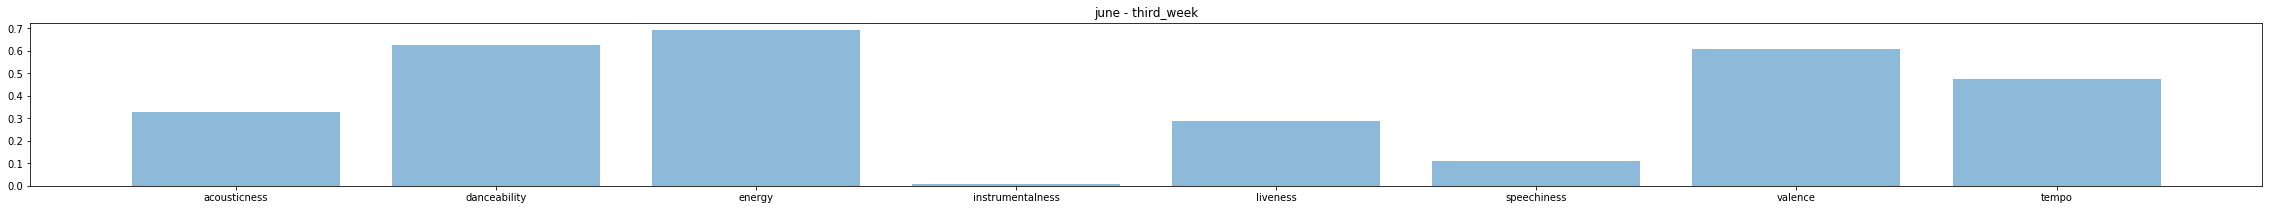

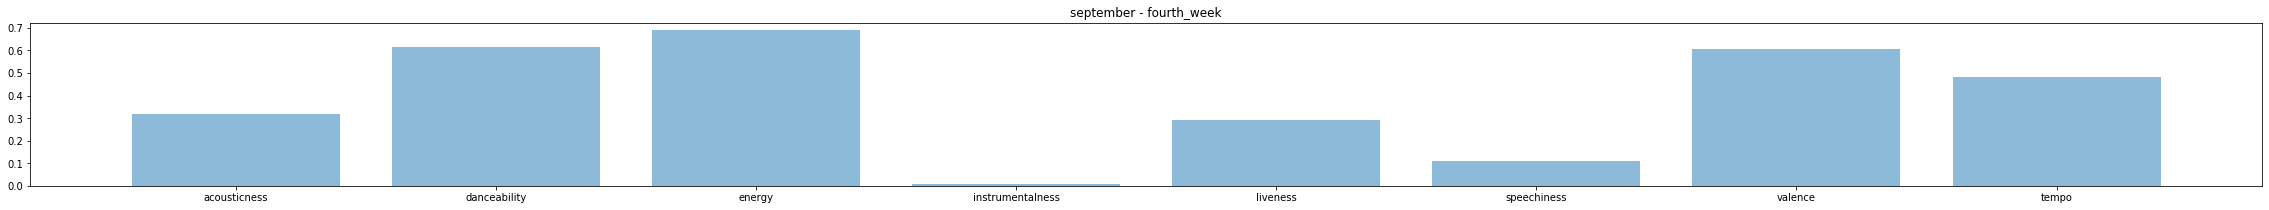

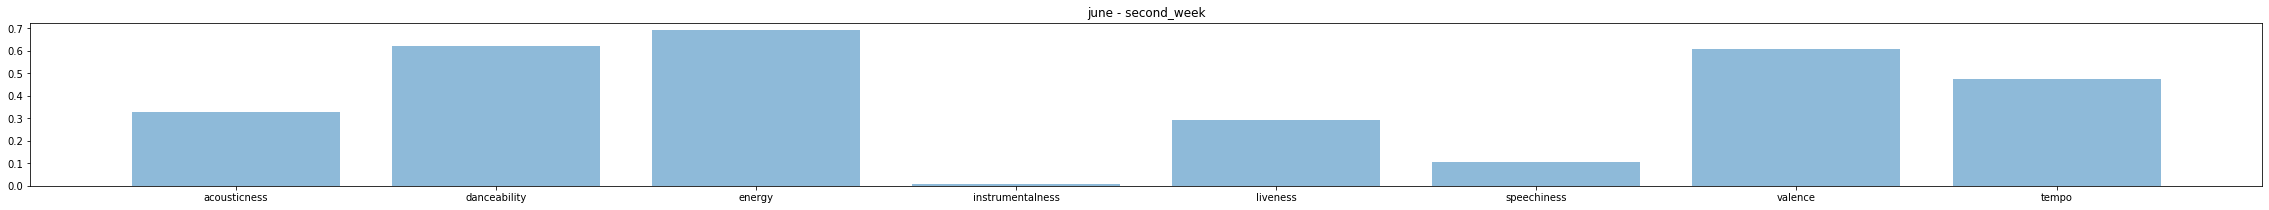

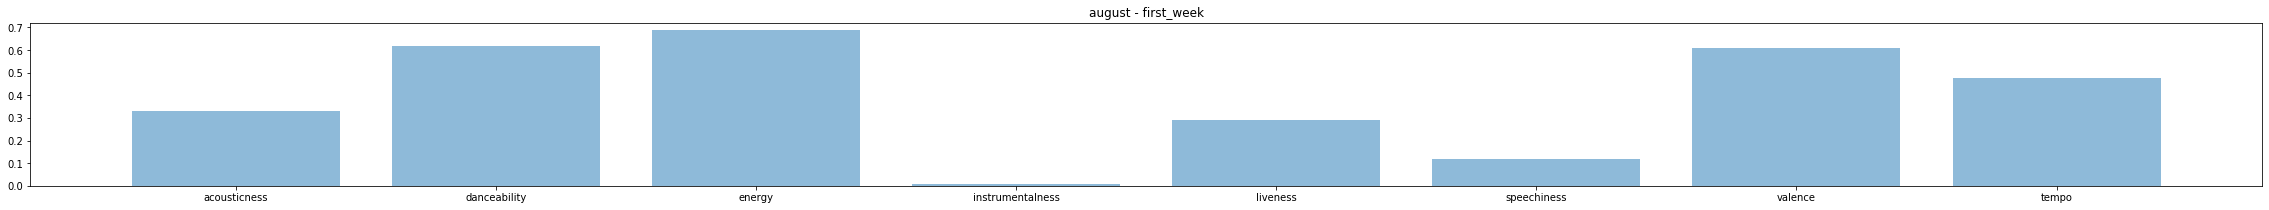

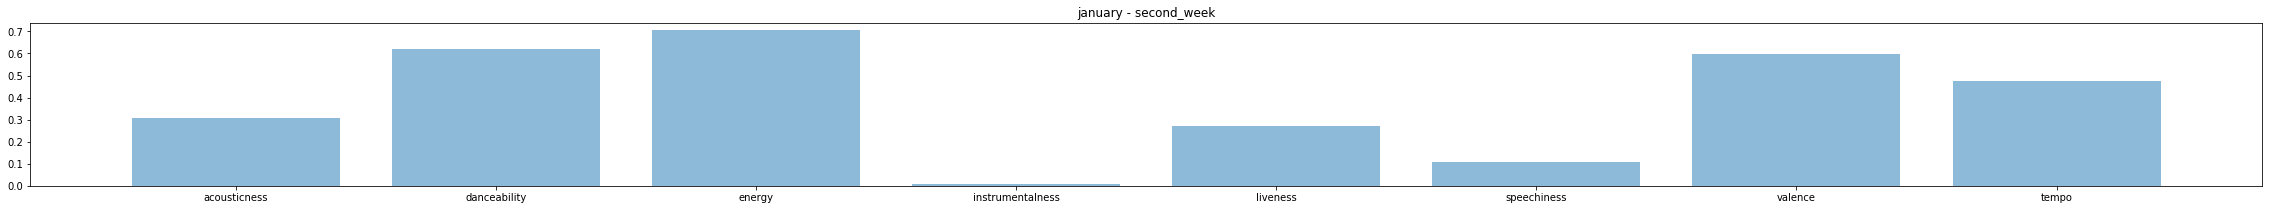

In [72]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

files = os.listdir("./mean_months/")

for file in files:
    
    if file == "graphs":
        continue

    with open(f'./mean_months/{file}') as json_file:
        json_file = json.load(json_file)

        if not 'week' in json_file:
            continue
        
        

        acousticness = json_file['acousticness']
        danceability = json_file['danceability']
        energy = json_file['energy']
        instrumentalness = json_file['instrumentalness']
        liveness = json_file['liveness']
        speechiness = json_file['speechiness']
        valence = json_file['valence']
        tempo = json_file['tempo']
        month = json_file['month']
        week = json_file['week']

        labels = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "valence", "tempo"]
        values = [acousticness, danceability, energy, instrumentalness, liveness, speechiness, valence, tempo]

        y_pos = np.arange(len(labels))

        plt.figure(figsize=(40, 3))

        plt.bar(y_pos, values, align='center', alpha=0.5)
        plt.xticks(y_pos, labels)
        plt.title(f'{month} - {week}')

        plt.savefig(f'./mean_months/graphs/{month}-{week}.png')